In [23]:
!mkdir -p /content/drive/MyDrive/Github/kaggle/house-prices-advanced-regression-techniques

In [32]:
%cd /content/drive/MyDrive/Github/kaggle

/content/drive/MyDrive/Github/kaggle


In [33]:
!git init house-prices-advanced-regression-techniques

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Github/kaggle/house-prices-advanced-regression-techniques/.git/


In [36]:
%cd house-prices-advanced-regression-techniques

/content/drive/MyDrive/Github/kaggle/house-prices-advanced-regression-techniques


In [37]:
!git add *

In [42]:
!git config --global user.email "1337976827@qq.com"
!git config --global user.name "Your Name"

In [39]:
!git commit -am "add files"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@18502b400b3e.(none)')


In [1]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config set -n path -v /content

- path is now set to: /content


In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 49.1MB/s]


In [6]:
!unzip /content/competitions/house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip

Archive:  /content/competitions/house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [7]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 122.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.5 MB/s eta 0:00:00
  Created wheel for pandas: filename=pandas-1.2.4-cp310-cp310-linux_x86_64.whl size=34330468 sha256=e9473142dbb7927fa5edc5f4de2212205e8ad73d0

In [21]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils import data
# from torch.utils.tensorboard import SummaryWriter
from sklearn.model_selection import train_test_split
import datetime
import warnings

import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from d2l import torch as d2l

warnings.filterwarnings("ignore")



def log_transform(train,feature):
    train[feature] = np.log1p(train[feature].values)

def quadratic(train,feature):
    train[feature+'2'] = train[feature]**2

def transform(train):
    log_cols = ['GrLivArea','1stFlrSF','2ndFlrSF','TotalBsmtSF','LotArea','LotFrontage','KitchenAbvGr','GarageArea']
    quad_cols = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','2ndFlrSF','Neighborhood_E','RoofMatl_E','GrLivArea']
    for col in order_dict.keys():
        encode(train,col)
    for col in log_cols:
        log_transform(train,col)
    for col in quad_cols:
        quadratic(train,col)

    train['HasBasement'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    train['HasGarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    train['Has2ndFloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    train['HasMasVnr'] = train['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
    train['HasWoodDeck'] = train['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
    train['HasPorch'] = train['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
    train['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    train['IsNew'] = train['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

def gen_encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    return ordering

def encode(frame,feature):
    for cat, o in order_dict[feature].items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o


def load_array(data_arrays,batch_size,is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

class MySequential(nn.Module):
    def __init__(self,*args):
        super().__init__()
        for name,block in args:
            self._modules[name] = block

    def forward(self,X):
        for block in self._modules.values():
            X = block(X)
        return X

def torch_log_loss(predictions, targets):
    log_predictions = torch.log(predictions)
    log_targets = torch.log(targets)
    squared_diff = (log_predictions - log_targets)**2
    mse_loss = torch.mean(squared_diff)
    sqrt_mse_loss = torch.sqrt(mse_loss)
    return sqrt_mse_loss


def train_k_fold(i,model,t,epochs,trainer,train_X,train_y,valid_X,valid_y,weight_decay,epoch_cur,animator,log_flag = False):
    # if log_flag:
#         t = datetime.datetime.now().strftime('%Y%m%d%H%M')
        # train_writer = SummaryWriter(f'logs/train_{t}')
        # test_writer = SummaryWriter(f'logs/test_{t}')
#     print("start**************************")
#     model = nn.Sequential(nn.Linear(len(features),1))
#     trainer = torch.optim.Adam(model.parameters(), lr=0.1,weight_decay=weight_decay)
#     print(type(trainer))
#     trainer = torch.optim.Adam(model.parameters(), lr=lr,weight_decay=weight_decay)
#     print(type(trainer))
    loss = nn.MSELoss()
    data_iter = load_array((train_X,train_y),100)

#     epochs = 50
    for epoch in range(epochs):

        for X,y in data_iter:
            l = loss(model(X),y)
            trainer.zero_grad()
            l.backward()
            trainer.step()
        if log_flag:
            # train_loss = loss(model(train_X),train_y).sqrt().item()
            # valid_loss = loss(model(valid_X),valid_y).sqrt().item()
            train_loss = torch_log_loss(model(train_X),train_y).item()
            valid_loss = torch_log_loss(model(valid_X),valid_y).item()
            # print(f'epoch {epoch+1},train_loss:{train_loss:f},valid_loss:{valid_loss:f}')
            # train_writer.add_scalar(f'Loss/{i}', train_loss, epoch)
            # test_writer.add_scalar(f'Loss/{i}', valid_loss, epoch)
            animator.add(epoch_cur + epoch + 1, [train_loss,valid_loss])
    # if log_flag:
    #     train_writer.close()
    #     test_writer.close()
    # train_loss = loss(model(train_X),train_y).sqrt().item()
    # valid_loss = loss(model(valid_X),valid_y).sqrt().item()
    train_loss = torch_log_loss(model(train_X),train_y).item()
    valid_loss = torch_log_loss(model(valid_X),valid_y).item()
#     print(f'train_loss:{train_loss:f},valid_loss:{valid_loss:f}')
    return train_loss,valid_loss,model

def get_k_fold_data(df,k,i):
    if k == 1:
        return df,df
    l = len(df) // k
    start = i*l
    end = (i+1)*l
    valid_df = df[start:end]
    train_df = pd.concat([df[:start],df[end:]])
    return train_df,valid_df

def pred_train(models,train):
    nn_train = train[['Id','log_SalePrice']]
    for i in range(len(models)):
        nn_train[f'SalePrice_{i}'] = models[i](torch.tensor(train[features].fillna(0.).values, dtype=torch.float32)).detach().reshape(-1,1).numpy()
    nn_train['SalePrice'] = nn_train[[f'SalePrice_{i}' for i in range(len(models))]].mean(axis=1)
    nn_train['bias'] = nn_train['SalePrice']-train['log_SalePrice']
    plt.figure(1)
    sns.distplot(train['bias'], kde=False, fit=st.norm)
    plt.figure(2)
    sns.distplot(nn_train['bias'], kde=False, fit=st.norm,label='nn')
    plt.figure(3)
    sns.distplot(nn_train['bias'], kde=False, fit=st.norm,label='nn')
    sns.distplot(train['bias'], kde=False, fit=st.norm,label='linear')
    plt.legend()
    return nn_train


In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# 标准化后，每个特征的均值变为0，所以可以直接用0来替换缺失值
all_features[numeric_features] = all_features[numeric_features].fillna(0)
all_features = pd.get_dummies(all_features, dummy_na=True)
n_train = train_data.shape[0]
train_features = all_features[:n_train]
test_features = all_features[n_train:]
train_features['log_SalePrice'] = np.log(train_data['SalePrice'])
train_features['SalePrice'] = train_data['SalePrice']
features = train_features.columns[:-2]
# train_labels = torch.tensor(train_data.SalePrice.values).reshape((-1, 1))

0 0.1057083010673523 0.12638181447982788
0.02114166021347046
0.025276362895965576


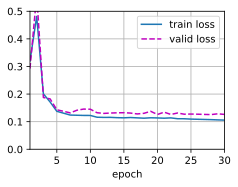

In [22]:
from logging import LogRecord
# torch.set_default_dtype(torch.float32)
k = 5
lrs = [[10,1],[20,0.1]] #,[30,0.001]
dropout_prob = 0.1
weight_decay = 100
loss = [[0]*k for i in range(2)]
valid_loss = [0]*k
models = []

dt = datetime.datetime.now().strftime('%Y%m%d%H%M')
for i in range(1):
#     train_df,valid_df = get_k_fold_data(train,k,i)
    train_df,valid_df = get_k_fold_data(train_features,k,i)
    train_X = torch.tensor(train_df[features].fillna(0.).values, dtype=torch.float32)
    valid_X = torch.tensor(valid_df[features].fillna(0.).values, dtype=torch.float32)
    train_y = torch.tensor(train_df['SalePrice'].values, dtype=torch.float32).reshape(-1,1)
    valid_y = torch.tensor(valid_df['SalePrice'].values, dtype=torch.float32).reshape(-1,1)
#     train_y = torch.tensor(train_df['SalePrice'].values, dtype=torch.float32).reshape(-1,1)
#     valid_y = torch.tensor(valid_df['SalePrice'].values, dtype=torch.float32).reshape(-1,1)
    log_flag = True if i == 0 else False
#     model = nn.Sequential(nn.Linear(train_X.shape[1],1))
    epochs = 0
    for lr in lrs:
      epochs += lr[0]
    model = nn.Sequential(nn.Linear(train_X.shape[1],64),nn.ReLU(),nn.Linear(64,1))
    animator = d2l.Animator(xlabel='epoch', xlim=[1, epochs], ylim=[0, 0.5],
                        legend=['train loss', 'valid loss'])
    epoch_cur = 0
    for lr in lrs:
        adam_trainer = torch.optim.Adam(model.parameters(), lr=lr[1],weight_decay=weight_decay)
#         t = f'feature_trans_64_1_adam_{lr[0]}_{lr[1]}_{dropout_prob}_{dt}'
        t = f'linear_{lr[0]}_{lr[1]}_{dropout_prob}_{dt}'
        loss[0][i],loss[1][i],model = train_k_fold(i,model,t,lr[0],adam_trainer,train_X,train_y,valid_X,valid_y,
                                                   weight_decay,epoch_cur,animator,log_flag)
        epoch_cur += lr[0]

    models.append(model)
    print(i,loss[0][i],loss[1][i])
#     print(train_X[:1,:3])
for i in range(2):
    print(np.array(loss[i]).mean())
#     print(torch.mean(torch.stack(loss[i])))
#     print(torch.stack(loss[i]))